<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/ML%26DL/12%EC%9B%94%208%EC%9D%BC/12%EC%9B%94_8%EC%9D%BC_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMean & DBSCAN

In [ ]:
# K-Means 비지도 학습을 해보아요!
# 필요 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [ ]:
# 데이터를 랜덤하게 생성할거에요
# 군집형태로 되어있는 군집데이터 생성할거에요!

# n_samples = 생성할 데이터 개수
# centers = cluster의 개수
# n_features = 쉽게 말하면 데이터의 차원 의미

points,labels = make_blobs(n_samples=100,
                           centers=4,
                           n_features=2,
                           random_state=100)
points.shape
labels.shape


# 랜덤으로 생성된 데이터를 2차원 평면에 Scatter를 이용해서
# 표현해 보아요!
plt.scatter(points[:,0], points[:,1])
plt.show()

In [ ]:
# KMeans는 hyperparameter(우리가 직접 정해줘야하는 값)이 k값, 클러스터의 개수
# n_init -> k-means 알고리즘을 실행해 가장 좋은경우 선택,
#           초기값은 10으로 주어짐, 과거에는 이 값을 우리가 설정했지만
#           왠만하면 auto로 설정하는게 좋음
kmeans_cluster = KMeans(n_clusters=4,
                        n_init='auto',
                        random_state=100)

# 모델이 만들어졌으니 이제 학습을 해야겠죠
kmeans_cluster.fit(points)

# labels_ : 클러스터값.
kmeans_cluster.labels_

array([1, 3, 3, 0, 0, 1, 1, 2, 0, 2, 0, 0, 1, 2, 1, 2, 3, 3, 3, 2, 2, 2,
       2, 0, 1, 3, 2, 3, 2, 1, 1, 1, 1, 2, 3, 2, 2, 3, 0, 2, 1, 3, 0, 3,
       2, 2, 3, 3, 1, 0, 1, 2, 0, 3, 1, 1, 2, 3, 3, 2, 1, 0, 2, 1, 1, 0,
       2, 0, 2, 1, 0, 3, 0, 1, 2, 3, 3, 3, 0, 1, 0, 0, 0, 3, 1, 2, 0, 0,
       2, 3, 0, 3, 3, 1, 0, 1, 0, 3, 1, 0], dtype=int32)

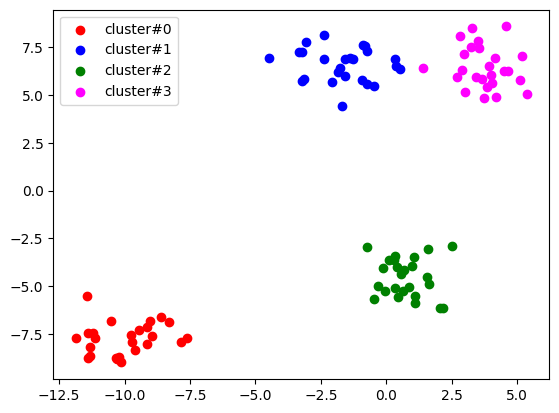

In [ ]:
# clustering한 결과를 시각화

my_color = {0: 'red', 1: 'blue', 2: 'green', 3: 'magenta'}

# 각 cluster마다 scatter를 반복적으로 그리면 되요!
for n in range(4):
    cluster_sub_points = points[kmeans_cluster.labels_ == n]
    plt.scatter(cluster_sub_points[:,0],
                cluster_sub_points[:,1],
                color=my_color[n],
                label=f'cluster#{n}')

plt.legend()
plt.show()

In [ ]:
# predict
new_point = np.array([[0.0,0.0]])
result = kmeans_cluster.predict(new_point)
result

array([2], dtype=int32)

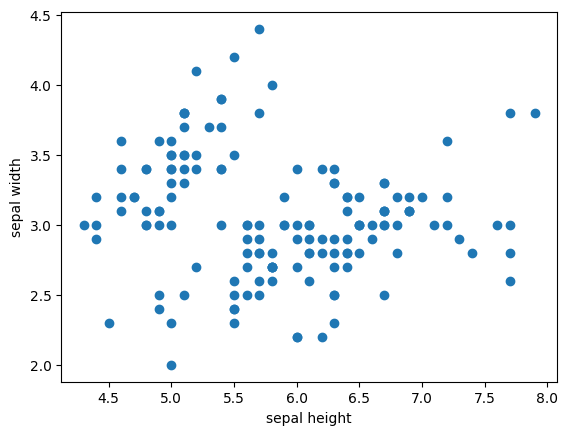

In [ ]:
# 랜덤 데이터를 통해 K-means 알고리즘이 작동하는 것을 확인
# 이제 우리가 알고 있는 데이터로 확인해보자 -> iris 데이터

# iris 데이터는 독립변수가 4개에요
# 꽃받침의 길이와 너비, 꽃잎의 길이와 너비
# 종속변수는 3개 존재 -> 붓꽃의 종류

# 독립변수를 4개 사용하면 2차원평면에 그림을 그릴수가 없어요!
# 2차원 평면에 클러스터링이 된 결과를 확인하기 위해
# 꽃받침길이, 꽃받침의 너비 두개의 feature만 사용해 보아요!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

iris = load_iris()
sample = iris.data
x = sample[:,0]
y = sample[:,1]
plt.scatter(x,y)
plt.xlabel('sepal height')
plt.ylabel('sepal width')
plt.show()

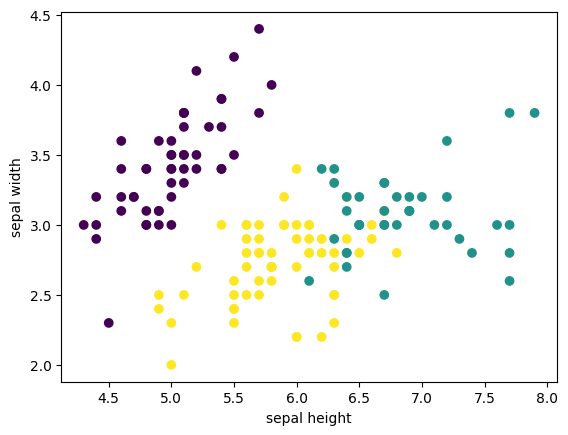

In [ ]:
model = KMeans(n_clusters=3,
               n_init='auto')
model.fit(sample)
labels = model.predict(sample)

x = sample[:,0]
y = sample[:,1]
plt.scatter(x,y, c=labels)
plt.xlabel('sepal height')
plt.ylabel('sepal width')
plt.show()

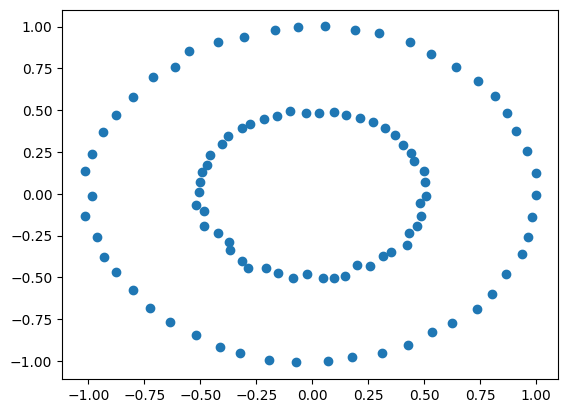

In [ ]:
# iris 데이터에도 잘 작동
# 왠만한 clustering을 위한 학습과 예측은 K-Means 알고리즘으로 해결 가능

# but, 문제가 하나 있다
# 데이터의 분포에 따라 의도치 않은 상황이 발생할 수 있는데
# 알고리즘의 특성 때문

#  이런 형태(K-Means로 clustering이 잘 되지 않는 경우)는 크게
# 3가지가 존재해요!
# -> 원형, 달, 사선

# 1. 데이터가 원형인 경우 K-Means가 잘 작동하지 않는다
from sklearn.datasets import make_circles

# make_circles는 두 개의 원으로 이루어진 데이터 생성
# n_samples = 데이터의 개수
# factor = 두 원 사이의 거리
#          0에 가까울수록 멀어지고, 1에 가까울수록 거리가 가까움
# noise = 데이터에 추가되는 무작위 노이즈 값(노이즈가 커지면 원의 형태가 이상하게 변함)
circle_points, circle_labels = make_circles(n_samples=100,
                                            factor=0.5,
                                            noise=0.01)

plt.scatter(circle_points[:,0],circle_points[:,1])
plt.show()

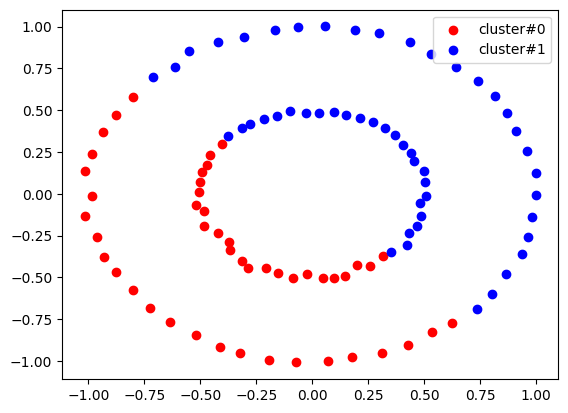

In [ ]:
circle_model = KMeans(n_clusters=2,
                      n_init='auto')

circle_model.fit(circle_points)

# 시각화 확인
my_color = {0 : 'red', 1 : 'blue'}
for n in range(2):
    circle_sub_point = circle_points[circle_model.labels_==n]
    plt.scatter(circle_sub_point[:,0],
                circle_sub_point[:,1],
                color=my_color[n],
                label=f'cluster#{n}')

plt.legend()
plt.show()

# cluster로 나눠지긴 했지만, 결과는 우리가 원하는 것도 좀 다르다..!

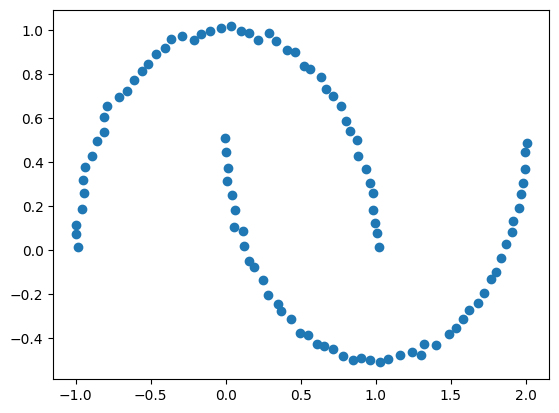

In [ ]:
# 2번째 경우를 알아보죠!
from sklearn.datasets import make_moons

moon_points, moon_labels = make_moons(n_samples=100,
                                      noise=0.01)

plt.scatter(moon_points[:,0],
            moon_points[:,1])
plt.show()

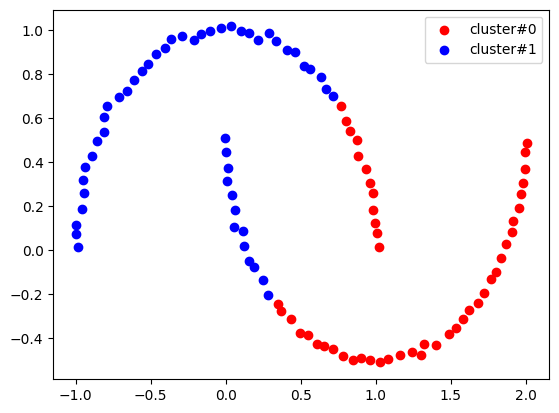

In [ ]:
moon_model = KMeans(n_clusters=2,
                    n_init='auto')

moon_model.fit(moon_points)

my_color={0 :'red', 1 : 'blue'}
for n in range(2):
    moon_sub_point = moon_points[moon_model.labels_==n]
    plt.scatter(moon_sub_point[:,0],
                moon_sub_point[:,1],
                color=my_color[n],
                label=f'cluster#{n}')
plt.legend()
plt.show()

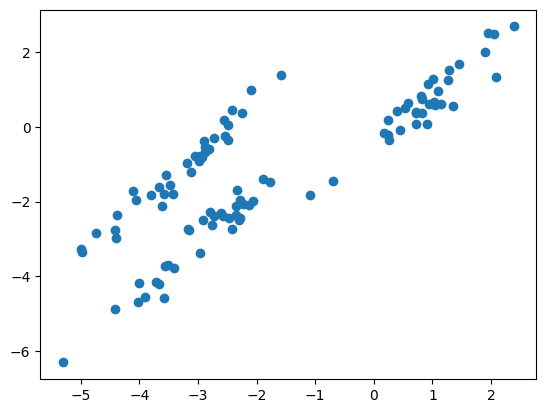

In [ ]:
# 3번째 데이터 분포에요!
from sklearn.datasets import make_blobs

diag_points, _ = make_blobs(n_samples=100,
                            random_state=170)

# 대각행렬 이용해 데이터를 대각선으로 분포
transform = [[0.6,0.6],
             [-0.4,-0.8]]
diag= np.dot(diag_points, transform)

plt.scatter(diag[:,0], diag[:,1])
plt.show()

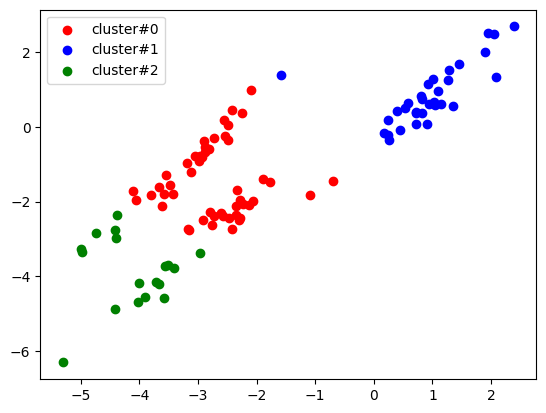

In [ ]:
diag_model = KMeans(n_clusters=3,
                    n_init='auto')
diag_model.fit(diag)

my_color = {0 : 'red', 1 : 'blue', 2 : 'green'}
for n in range(3):
    diag_sub_point = diag[diag_model.labels_==n]
    plt.scatter(diag_sub_point[:,0],
                diag_sub_point[:,1],
                color=my_color[n],
                label=f'cluster#{n}')
plt.legend()
plt.show()

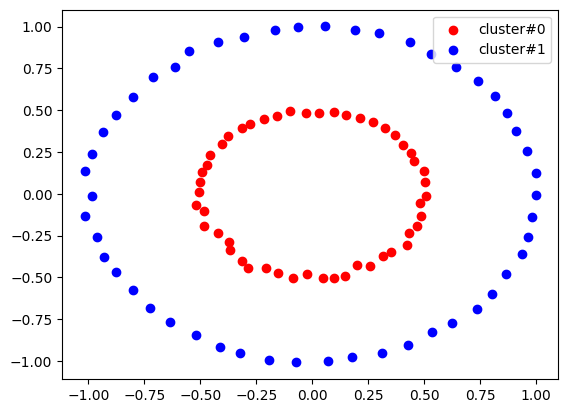

In [ ]:
# DBSCAN을 이용해서 KMeans의 문제점을 해결해보아요!
# 1. 원형 데이터

from sklearn.datasets import make_circles
cirlce_points,_ = make_circles(n_samples=100,
                               factor=0.5,
                               noise=0.01)

# plt.scatter(circle_points[:,0],circle_points[:,1])
# plt.show()

epsilon=0.2
minPts=3

from sklearn.cluster import DBSCAN
circle_model = DBSCAN(eps=epsilon,
                      min_samples=minPts)
circle_model.fit(circle_points)

# cluster의 수는 몇개 나오나요?
max(circle_model.labels_)+1

my_color = {0 : 'red', 1 : 'blue'}
for n in range(2):
    circle_sub_point = circle_points[circle_model.labels_==n]
    plt.scatter(circle_sub_point[:,0],
                circle_sub_point[:,1],
                color=my_color[n],
                label=f'cluster#{n}')

plt.legend()
plt.show()

# 이제 우리가 원하는대로 나왔네요!


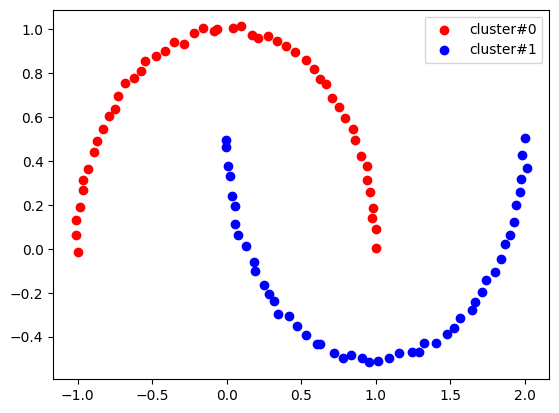

In [ ]:
# 2번째 데이터도 해봐요
from sklearn.datasets import make_moons

moon_points, moon_labels = make_moons(n_samples=100,
                                      noise=0.01)

epsilon=0.2
minPts=3

moon_model = DBSCAN(eps=epsilon,
                    min_samples=minPts)

moon_model.fit(moon_points)

my_color={0 :'red', 1 : 'blue'}
for n in range(2):
    moon_sub_point = moon_points[moon_model.labels_==n]
    plt.scatter(moon_sub_point[:,0],
                moon_sub_point[:,1],
                color=my_color[n],
                label=f'cluster#{n}')
plt.legend()
plt.show()

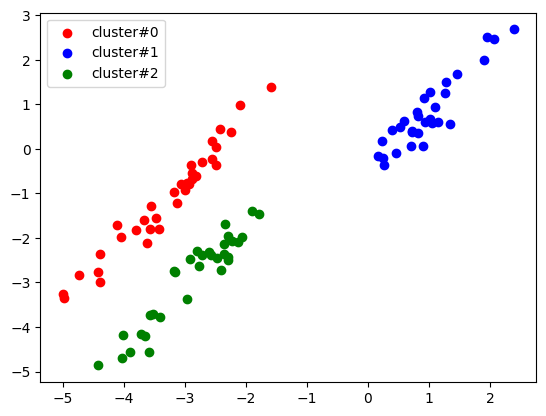

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

diag_points, _ = make_blobs(n_samples=100,
                                 random_state=170)

# 대각 행렬을 이용해서 데이터를 대각선 분포로 변경
transformation = [[0.6,0.6],
                  [-0.4,-0.8]]
diag_points = np.dot(diag_points, transformation)

# plt.scatter(diag_points[:,0], diag_points[:,1])
# plt.show()

epsilon=0.7
minPts= 3
diag_model = DBSCAN(eps=epsilon,
                    min_samples=3)

diag_model.fit(diag_points)
my_color ={0 : 'red', 1 : 'blue', 2 : 'green'}

for n in range(3):
    cluster_sub_points = diag_points[diag_model.labels_==n]
    plt.scatter(cluster_sub_points[:,0],
                cluster_sub_points[:,1],
                color=my_color[n],
                label=f'cluster#{n}')
plt.legend()
plt.show()

# 차원축소 기법

In [ ]:
# 차원축소기법 중 주성분분석(PCA)에 대해 알아보아요

# 사용할 예제는 역시나 iris!
# iris는 3가지 품종이 있고 이를 결정짓는 4가지 요소가 있어요!
# 꽃받침(sepal)의 길이와 너비, 꽃잎(petal)의 길이와 너비

# 이 데이터를 차원 축소의 예제로 드는 이유는?
# 독립변수에 대해 상관관계 분석을 해보면 상관관계가 높은 요소 존재
# 이런 경우, 차원축소를 하면 좀 더 좋은 모델을 얻을 수도 있다.

# 필요 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(iris.data,
                       columns=['sepal_height',
                                'sepal_width',
                                'petal_height',
                                'petal_width'])
iris_df

# 상관관계 분석
iris_df.corr()

# feature간에 연관성이 깊어요!
# 따라서 주성분분석(PCA)을 통해 차원을 축소해서 사용하면
# 약간의 데이터 로스가 발생하겠지만 모델의 복잡도가 줄고
# overfitting도 줄어들어서 더 좋은 모델이 만들어 질 수 도 있어요!

# 주성분의 개수를 몇개로 하면 좋을까?
# 주성분의 분산을 사용하면 된다!
from sklearn.decomposition import PCA
pca = PCA(random_state=1004)  # 주성분의 개수를 않줬어요!
                              # 차원을 축소하지는 않아요!

pca.fit_transform(iris_df)
pca.explained_variance_ratio_
# array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [ ]:
# 원래 Iris 데이터는 4개의 feature로 되어 있고
# 종속변수를 가지고 있어요. (붓꽃의 품종)
# 이전에 우리 다중분류할때 이 예제를 이용했었는데
# 그거 다시 한번 실행해서
# 원래 데이터로 다중분류했을때의 모델의 정확도를 산출
# 여러분들이 구현할 꺼예요!

# 4개의 독립변수를 차원축소해서 2개의 주성분으로 줄여요!
# 이렇게 데이터를 변환한 다음 다중분류 모델을 만들어서
# 학습하고 정확도를 산출할꺼예요!

# 필요 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Raw Data Loading
iris = load_iris()
x_data = iris.data
t_data = iris.target

# 결측치와 이상치는 처리하지 않아요
# 정규화 진행
scaler = StandardScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# PCA를 사용하여 차원 축소를 해보아요!
# 주성분은 2개로 할 예정이에요
n_components = 2
pca = PCA(n_components=n_components)
x_data_norm_pca = pca.fit_transform(x_data_norm)
x_data_norm_pca

# 차원축소도 끝났으니,
# 데이터 분리를 진행해보아요
x_data_train_norm_pca, x_data_test_norm_pca, t_data_train, t_data_test = \
train_test_split(x_data_norm_pca, t_data,
                 stratify=t_data,
                 test_size=0.3)

In [ ]:
# sklearn 구현
sklearn_model = LogisticRegression()

sklearn_model.fit(x_data_train_norm_pca,
                  t_data_train)

# 평가를 위해 예측치 생성
predict = sklearn_model.predict(x_data_test_norm_pca)
accuracy = accuracy_score(t_data_test,predict)
accuracy

0.8666666666666667

In [ ]:
# 차원축소를 하지 않고 정확도 계산해서 비교!
x_data_train_norm, x_data_test_norm, t_data_train_ori, t_data_test_ori = \
train_test_split(x_data_norm,
                 t_data,
                 stratify=t_data,
                 test_size=0.3)

model = LogisticRegression()
model.fit(x_data_train_norm,
          t_data_train_ori)

predict = model.predict(x_data_test_norm)
acc = accuracy_score(t_data_test_ori,predict)
acc


0.9777777777777777

In [ ]:
# 위 과정을 tensorflow로 구현해 보아요!
# 데이터 전처리는 완료 되어있으니 모델 구현만 해서 확인해봅시다!
# 차원분리 ver.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import Adam

keras_model = Sequential()

keras_model.add(Flatten(input_shape=(2,)))
keras_model.add(Dense(units=3,
                      activation='softmax'))

keras_model.compile(optimizer=Adam(learning_rate=1e-1),
                    loss='sparse_categorical_crossentropy',
                    metrics=['acc'])

keras_model.fit(x_data_train_norm_pca,
                t_data_train,
                epochs=100,
                verbose=0,
                validation_split=0.2)

keras_model.evaluate(x_data_test_norm_pca, t_data_test)

2/2 [==============================] - 0s 12ms/step - loss: 1.0372 - acc: 0.5111


[1.0371626615524292, 0.5111111402511597]

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(4,)))
model.add(Dense(units=3,
                activation='softmax'))

model.compile(optimizer=Adam(learning_rate=1e-2),
                    loss='sparse_categorical_crossentropy',
                    metrics=['acc'])

model.fit(x_data_train_norm,
                t_data_train_ori,
                epochs=100,
                verbose=0,
                validation_split=0.2)

model.evaluate(x_data_test_norm,
               t_data_test_ori)

2/2 [==============================] - 0s 13ms/step - loss: 0.2014 - acc: 0.9111


[0.2014063447713852, 0.9111111164093018]